<a href="https://colab.research.google.com/github/naomori/codexa_LinearRegression_Practice/blob/master/Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section.1: ライブラリとデータの準備

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
from google.colab import files
uploaded = files.upload() 

Saving slr06.csv to slr06.csv


In [0]:
data = pd.read_csv('slr06.csv')

In [0]:
x = data['X']
y = data['Y']
m = len(x)

# Section.2: コスト（誤差）を算出する関数

最急降下法（Gradient Descent）では、学習回数（iterations）と学習率（Alpha）を設定して、
何度も計算することで、最適な値を導き出す。

求める線形モデルの数式は変わらない。

$\hat{y} = w_1x + w_0$

* $\hat{y}$ : 予測値（モデルと特徴量から予測した「ターゲット」値）

コストは以下で表される

$J(w_0, w_1) = \frac{1}{2n}\sum_{i=1}^{n}(\hat{y_i}-y_i)^2$

In [0]:
def cost(w0, w1, x, y):
  cost = 0
  for i in range(0, len(x)):
    y_hat = w1 * x[i] + w0
    cost += (y_hat - y[i])**2
    cost /= (2 * len(data))
  return cost

In [24]:
w0, w1 = 0, 0
cost_0 = cost(w0, w1, x, y)
print(cost_0)

282.7911198866909


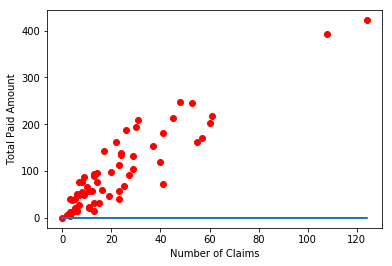

In [25]:
# 仮定モデルとデータの確認
plt.scatter(x, y, c='r')
plt.xlabel('Number of Claims')
plt.ylabel('Total Paid Amount')

plt.plot(x, x*w1 + w0, '-')
plt.show()

# Section.3: 最急降下法

最急降下法は以下の数式を使って、データセットから最適なw1（係数）とw0（定数項）を求める

$w_0 := w_0 - \alpha\frac{1}{m}\sum_{i=1}^{m}(\hat{y_i}-y_i)$

$w_1 := w_1 - \alpha\frac{1}{m}\sum_{i=1}^{m}(\hat{y_i}-y_i)x_i$

In [0]:
# 必要なハイパーパラメタの設定
alpha = 0.001
init_w0 = 0
init_w1 = 0
iterations = 50000

In [0]:
def gradientDescent(w0_in, w1_in, x, y, alpha):
  w0_gradient = 0
  w1_gradient = 0
  m = len(x)
  for i in range(0, len(x)):
    y_hat = (w1_in * x[i]) + w0_in
    w0_gradient += (1/m) * (y_hat - y[i])
    w1_gradient += (1/m) * ((y_hat - y[i]) * x[i])
  w0_out = w0_in - (alpha * w0_gradient)
  w1_out = w1_in - (alpha * w1_gradient)
  return [w0_out, w1_out]

In [0]:
def run(x, y, init_w0, init_w1, alpha, iterations):
  w0 = init_w0
  w1 = init_w1
  J_hist = np.zeros((iterations, 1))
  for i in range(iterations):
    w0, w1 = gradientDescent(w0, w1, x, y, alpha)
    J_hist[i] = cost(w0, w1, x, y)
  return [w0, w1], J_hist

In [0]:
[w0, w1], J_hist = run(x, y, init_w0, init_w1, alpha, iterations)

In [46]:
# w1(係数)とw0(定数項)を確認
print(w0, w1)

19.99448575890538 3.4138235600708886


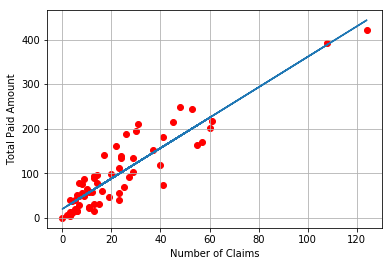

In [47]:
plt.scatter(x, y, c='r')
plt.xlabel('Number of Claims')
plt.ylabel('Total Paid Amount')

plt.plot(x, x*w1 + w0, '-')
plt.draw()
plt.grid(True)
plt.show()

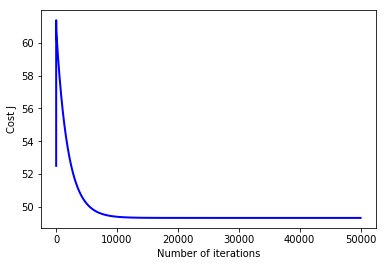

In [48]:
# コストの確認
plt.plot(range(J_hist.size), J_hist, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

# Section.4: RMSEで評価してみる



In [49]:
rmse = 0
for i in range(m):
  y_pred = w1 * x[i] + w0
  rmse += (y_pred - y[i])**2
rmse = np.sqrt(rmse/m)
print(rmse)

35.36582996879147


iterations = 10,000 では、最小二乗法の方が RMSE の値が小さく、優れていることが分かる


# まとめ

今回は、最急降下法よりも最小二乗法の方が結果が良かったが、
特徴量が多く、データセットのサイズが大規模になるにつれて、
最急降下法の方が計算処理が軽くなる。